In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


# 1-) Leitura dos Ddos

In [2]:
mushroom_df = pd.read_csv('../input/mushroom-classification/mushrooms.csv')
print(mushroom_df.shape)
mushroom_df.head()

(8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# 2-) Feaure Selection

In [3]:
feature_remove = ["ring-number",'veil-color','veil-type','gill-attachment','gill-size','bruises']

df = mushroom_df.drop(feature_remove,axis=1)
df.head()

,class,cap-shape,cap-surface,cap-color,odor,gill-spacing,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
0,p,x,s,n,p,c,k,e,e,s,s,w,w,p,k,s,u
1,e,x,s,y,a,c,k,e,c,s,s,w,w,p,n,n,g
2,e,b,s,w,l,c,n,e,c,s,s,w,w,p,n,n,m
3,p,x,y,w,p,c,n,e,e,s,s,w,w,p,k,s,u
4,e,x,s,g,n,w,k,t,e,s,s,w,w,e,n,a,g


# 3-) Feature Engineering

In [4]:
dataframe = pd.get_dummies(df,drop_first=True)
dataframe.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# 4-) Modelo

In [5]:
X = dataframe.iloc[:,1:].values
y = dataframe.iloc[:,0].values

print(f'X : {X.shape}')
print(f'y : {y.shape}')

X : (8124, 87)
y : (8124,)


In [6]:
X_training, X_test, y_training, y_test = train_test_split(X,y,test_size=0.25)

X_train, X_val, y_train, y_val = train_test_split(X_training,y_training, test_size=0.33)

print(f'X_test : {X_test.shape}')
print(f'y_test : {y_test.shape}')

print(f'X_val : {X_val.shape}')
print(f'y_val : {y_val.shape}')

print(f'X_train : {X_train.shape}')
print(f'y_train : {y_train.shape}')

X_test : (2031, 87)
y_test : (2031,)
X_val : (2011, 87)
y_val : (2011,)
X_train : (4082, 87)
y_train : (4082,)


In [7]:
from sklearn.linear_model import LogisticRegression

model1 = LogisticRegression(solver='liblinear').fit(X_train,y_train)

print("Acurácia no conjunto de treino: {:.3f}".format(model1.score(X_train, y_train)))
print("Acurácia no conjunto de validação: {:.3f}".format(model1.score(X_val, y_val)))

Acurácia no conjunto de treino: 0.999
Acurácia no conjunto de validação: 0.999


In [8]:
from sklearn.tree import DecisionTreeClassifier

model2 = DecisionTreeClassifier()

model2.fit(X_train,y_train)

print("Acurácia no conjunto de treino: {:.3f}".format(model2.score(X_train, y_train)))
print("Acurácia no conjunto de validação: {:.3f}".format(model2.score(X_val, y_val)))


Acurácia no conjunto de treino: 1.000
Acurácia no conjunto de validação: 1.000


In [9]:
y_pred_model2 = model2.predict(X_val)

print(classification_report(y_val,y_pred_model2))
print(f'AUC: {roc_auc_score(y_val,y_pred_model2):.2f}')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1048
           1       1.00      1.00      1.00       963

    accuracy                           1.00      2011
   macro avg       1.00      1.00      1.00      2011
weighted avg       1.00      1.00      1.00      2011

AUC: 1.00


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


[Text(0, 0, 'odor_n'),
 Text(1, 0, 'stalk-root_c'),
 Text(2, 0, 'stalk-root_r'),
 Text(3, 0, 'gill-spacing_w'),
 Text(4, 0, 'odor_c'),
 Text(5, 0, 'spore-print-color_r'),
 Text(6, 0, 'odor_m'),
 Text(7, 0, 'cap-color_y'),
 Text(8, 0, 'stalk-surface-above-ring_k'),
 Text(9, 0, 'cap-surface_g')]

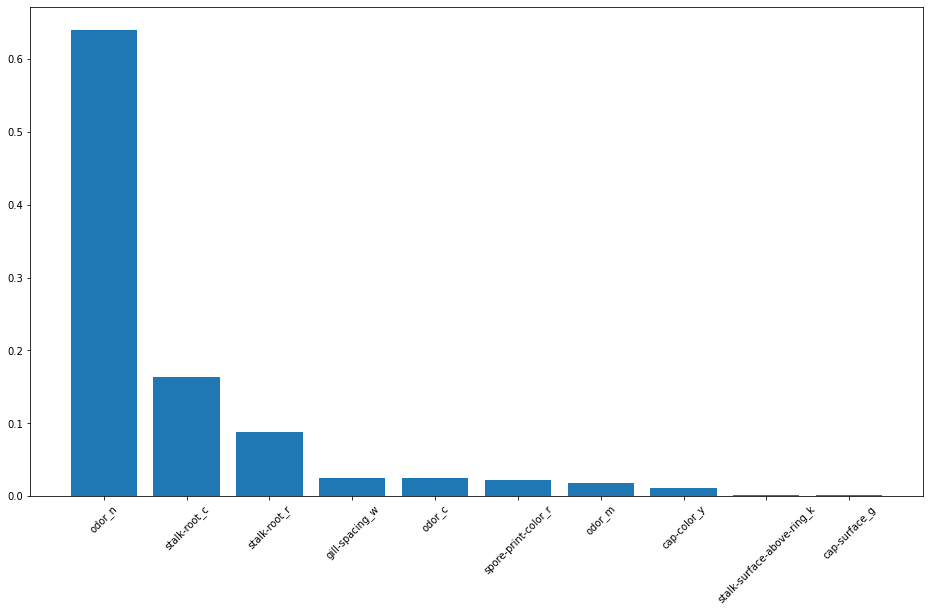

In [10]:
dic = {c:importance for c,importance in zip(dataframe.iloc[:,1:].columns,model2.feature_importances_)}

df_imp = pd.DataFrame({'Colunas':dic.keys(),'Importance':dic.values()}).sort_values(by='Importance',ascending=False).iloc[:10,:]

fig,ax = plt.subplots(figsize=(16,9))
ax.bar(df_imp.Colunas,df_imp.Importance)
ax.set_xticklabels(df_imp.Colunas,rotation = 45)

In [11]:
y_test_model2 = model2.predict(X_test)

print(classification_report(y_test,y_test_model2))
print(f'AUC: {roc_auc_score(y_test,y_test_model2):.2f}')
print(confusion_matrix(y_test,y_test_model2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1051
           1       1.00      1.00      1.00       980

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031

AUC: 1.00
[[1051    0]
 [   0  980]]
